In [71]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [83]:
! pip install pillow

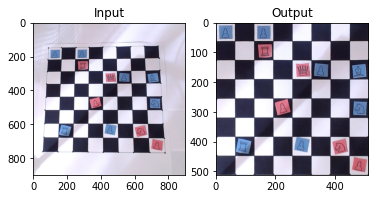

In [72]:
import matplotlib.pyplot as plt
img = cv.imread('captura3.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[92,152],[737, 142],[57, 764],[780, 770]])
pts2 = np.float32([[0,0],[512,0],[0,512],[512,512]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(512,512))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
peon_rojo
fondo_negro
peon_rojo
fondo_negro
fondo_blanco
reina_rojo
fondo_blanco
torre_rojo

In [73]:
dst.shape

(512, 512, 3)

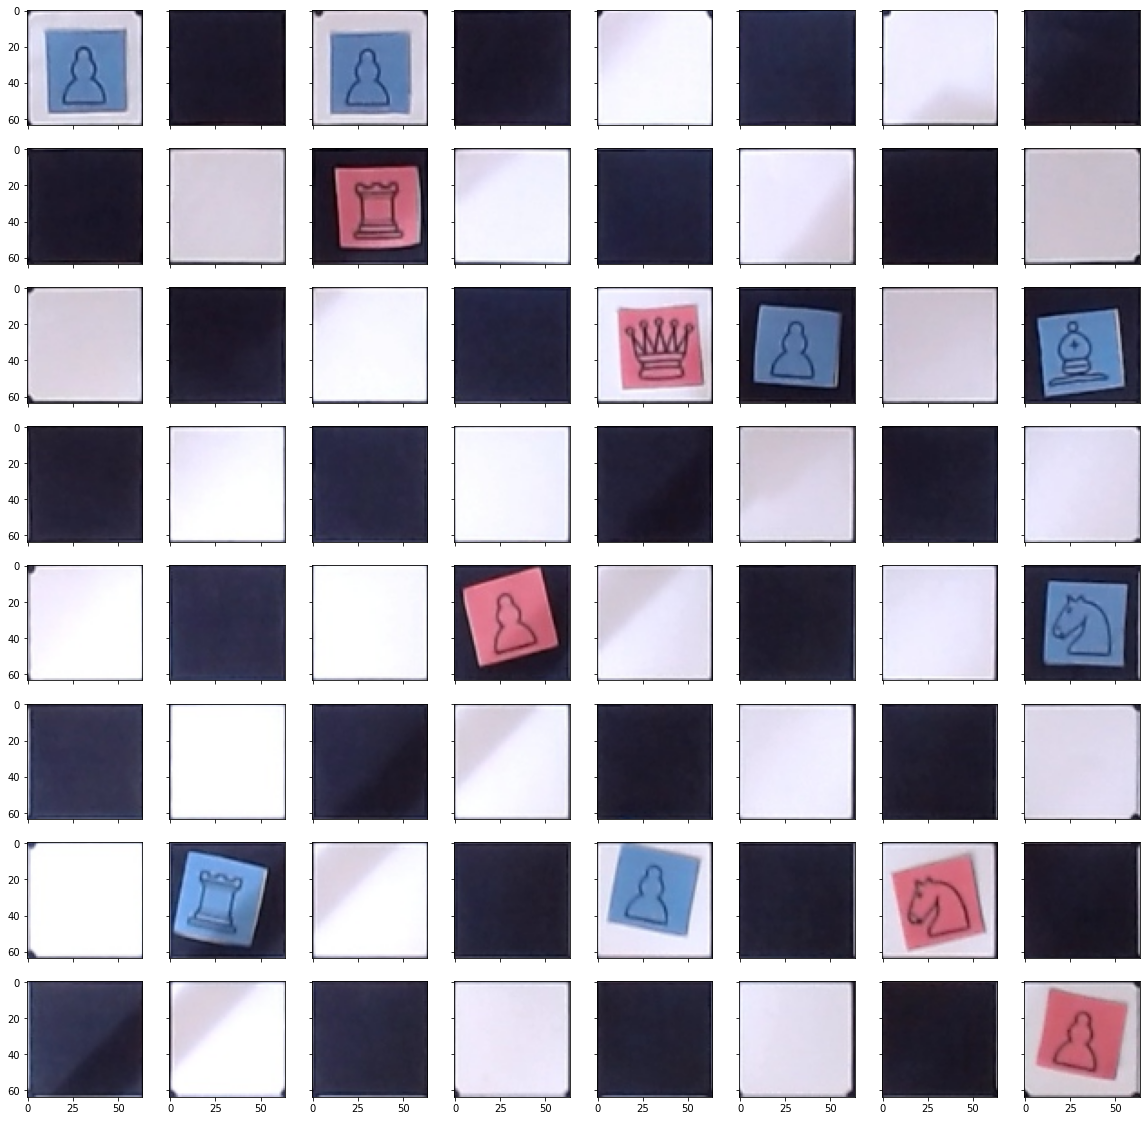

In [75]:
fig, axes = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True, figsize=(20,20))
squares = []
for i in range(8):
    for j in range(8):
        img2 = dst[64*i:64*i + 64, 64*j:64*j + 64]
        squares.append(img2)
        axes[i][j].imshow(img2)

In [76]:
squares = np.array(squares)

In [77]:
print(squares.shape)

(64, 64, 64, 3)


In [78]:
squares = squares.transpose((0, 3, 1, 2))

In [79]:
print(squares.shape)

(64, 3, 64, 64)


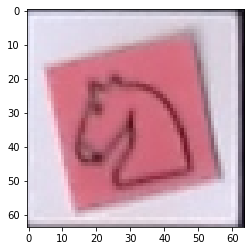

In [80]:
plt.imshow(squares[54].transpose(((1,2,0))))

In [81]:
import torch
x = torch.from_numpy(squares).float()

In [82]:
x.shape

torch.Size([64, 3, 64, 64])

In [67]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        self.pool2 = nn.MaxPool2d(2,2)
        self.pool4 = nn.MaxPool2d(4,4)
        # First conv layers
        self.conv1 = nn.Conv2d(3, 64, 7, padding=3)
        self.conv2 = nn.Conv2d(64, 128, 5, padding=2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256,512, 7, padding=3)
        #self.conv5 = nn.Conv2d(12,6, 3, padding=1)
        #self.conv6 = nn.Conv2d(6,3, 1, padding=0)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 14)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool2(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool4(x)
        x = F.relu(self.conv4(x))
        
        x = self.pool4(x)
        #x = F.relu(self.conv5(x))
        #x = F.relu(self.conv6(x))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the NN
model = ConvAutoencoder()
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))

from PIL import Image
from torchvision.transforms import ToTensor

mapping = {'alfil_azul': 0,
 'alfil_rojo': 1,
 'caballo_azul': 2,
 'caballo_rojo': 3,
 'fondo_blanco': 4,
 'fondo_negro': 5,
 'peon_azul': 6,
 'peon_rojo': 7,
 'reina_azul': 8,
 'reina_rojo': 9,
 'rey_azul': 10,
 'rey_rojo': 11,
 'torre_azul': 12,
 'torre_rojo': 13}

rev_mapping = {v:k for k,v in mapping.items()}

In [ ]:
def from_board_to_fne(board):
    mapping = {'alfil_azul': 'b',
     'alfil_rojo': 'B',
     'caballo_azul': 'n',
     'caballo_rojo': 'N',
     'fondo_blanco': '',
     'fondo_negro': '',
     'peon_azul': 'p',
     'peon_rojo': 'P',
     'reina_azul': 'q',
     'reina_rojo': 'Q',
     'rey_azul': 'K',
     'rey_rojo': 'k',
     'torre_azul': 'r',
     'torre_rojo': 'R'}
    
    def get_piece(piece):
        return {
            'alfil_azul': 'b',
            'alfil_rojo': 'B',
            'caballo_azul': 'n',
            'caballo_rojo': 'N',
            'peon_azul': 'p',
            'peon_rojo': 'P',
            'reina_azul': 'q',
            'reina_rojo': 'Q',
            'rey_azul': 'K',
            'rey_rojo': 'k',
            'torre_azul': 'r',
            'torre_rojo': 'R'
        }.get(piece, False)

    fne_board = []
    # 'for loop' until the shape is defined
    for row in board.splitlines():
        fne_row = ""
        empty_spaces = 0
        for piece in row:
            piece = get_piece(piece)
            if piece:
                if empty_spaces:
                    fne_row += str(empty_spaces)
                    fne_row += piece
                else:
                    fne_row += piece

                empty_spaces = 0
            else:
                empty_spaces += 1

        if empty_spaces:
            fne_row += str(empty_spaces)

        fne_board.append(fne_row)

    return "/".join(fne_board)[1:]


board = """
r.bqkb.r
pppp.Qpp
..n..n..
....p...
..B.P...
........
PPPP.PPP
RNB.K.NR
"""

print(from_board_to_fne(board))

In [68]:
%time y = model(x)
y = model(x)

CPU times: user 999 ms, sys: 165 ms, total: 1.16 s
Wall time: 980 ms


In [69]:
y = torch.max(y, 1)

In [70]:
for a in y.indices:
    print(rev_mapping[a.item()])

peon_rojo
fondo_negro
peon_rojo
fondo_negro
fondo_blanco
reina_rojo
fondo_blanco
torre_rojo
fondo_negro
fondo_blanco
torre_azul
fondo_blanco
reina_rojo
fondo_blanco
fondo_negro
fondo_blanco
fondo_blanco
fondo_negro
fondo_blanco
reina_rojo
reina_azul
peon_rojo
fondo_blanco
alfil_rojo
fondo_negro
fondo_blanco
reina_rojo
fondo_blanco
fondo_negro
fondo_blanco
fondo_negro
fondo_blanco
fondo_blanco
fondo_negro
fondo_blanco
peon_azul
fondo_blanco
fondo_negro
fondo_blanco
caballo_rojo
fondo_negro
fondo_blanco
fondo_negro
fondo_blanco
fondo_negro
fondo_blanco
fondo_negro
fondo_blanco
fondo_blanco
torre_rojo
fondo_blanco
fondo_negro
caballo_rojo
fondo_negro
caballo_azul
fondo_negro
fondo_negro
fondo_blanco
fondo_negro
fondo_blanco
fondo_negro
fondo_blanco
fondo_negro
peon_azul
